<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


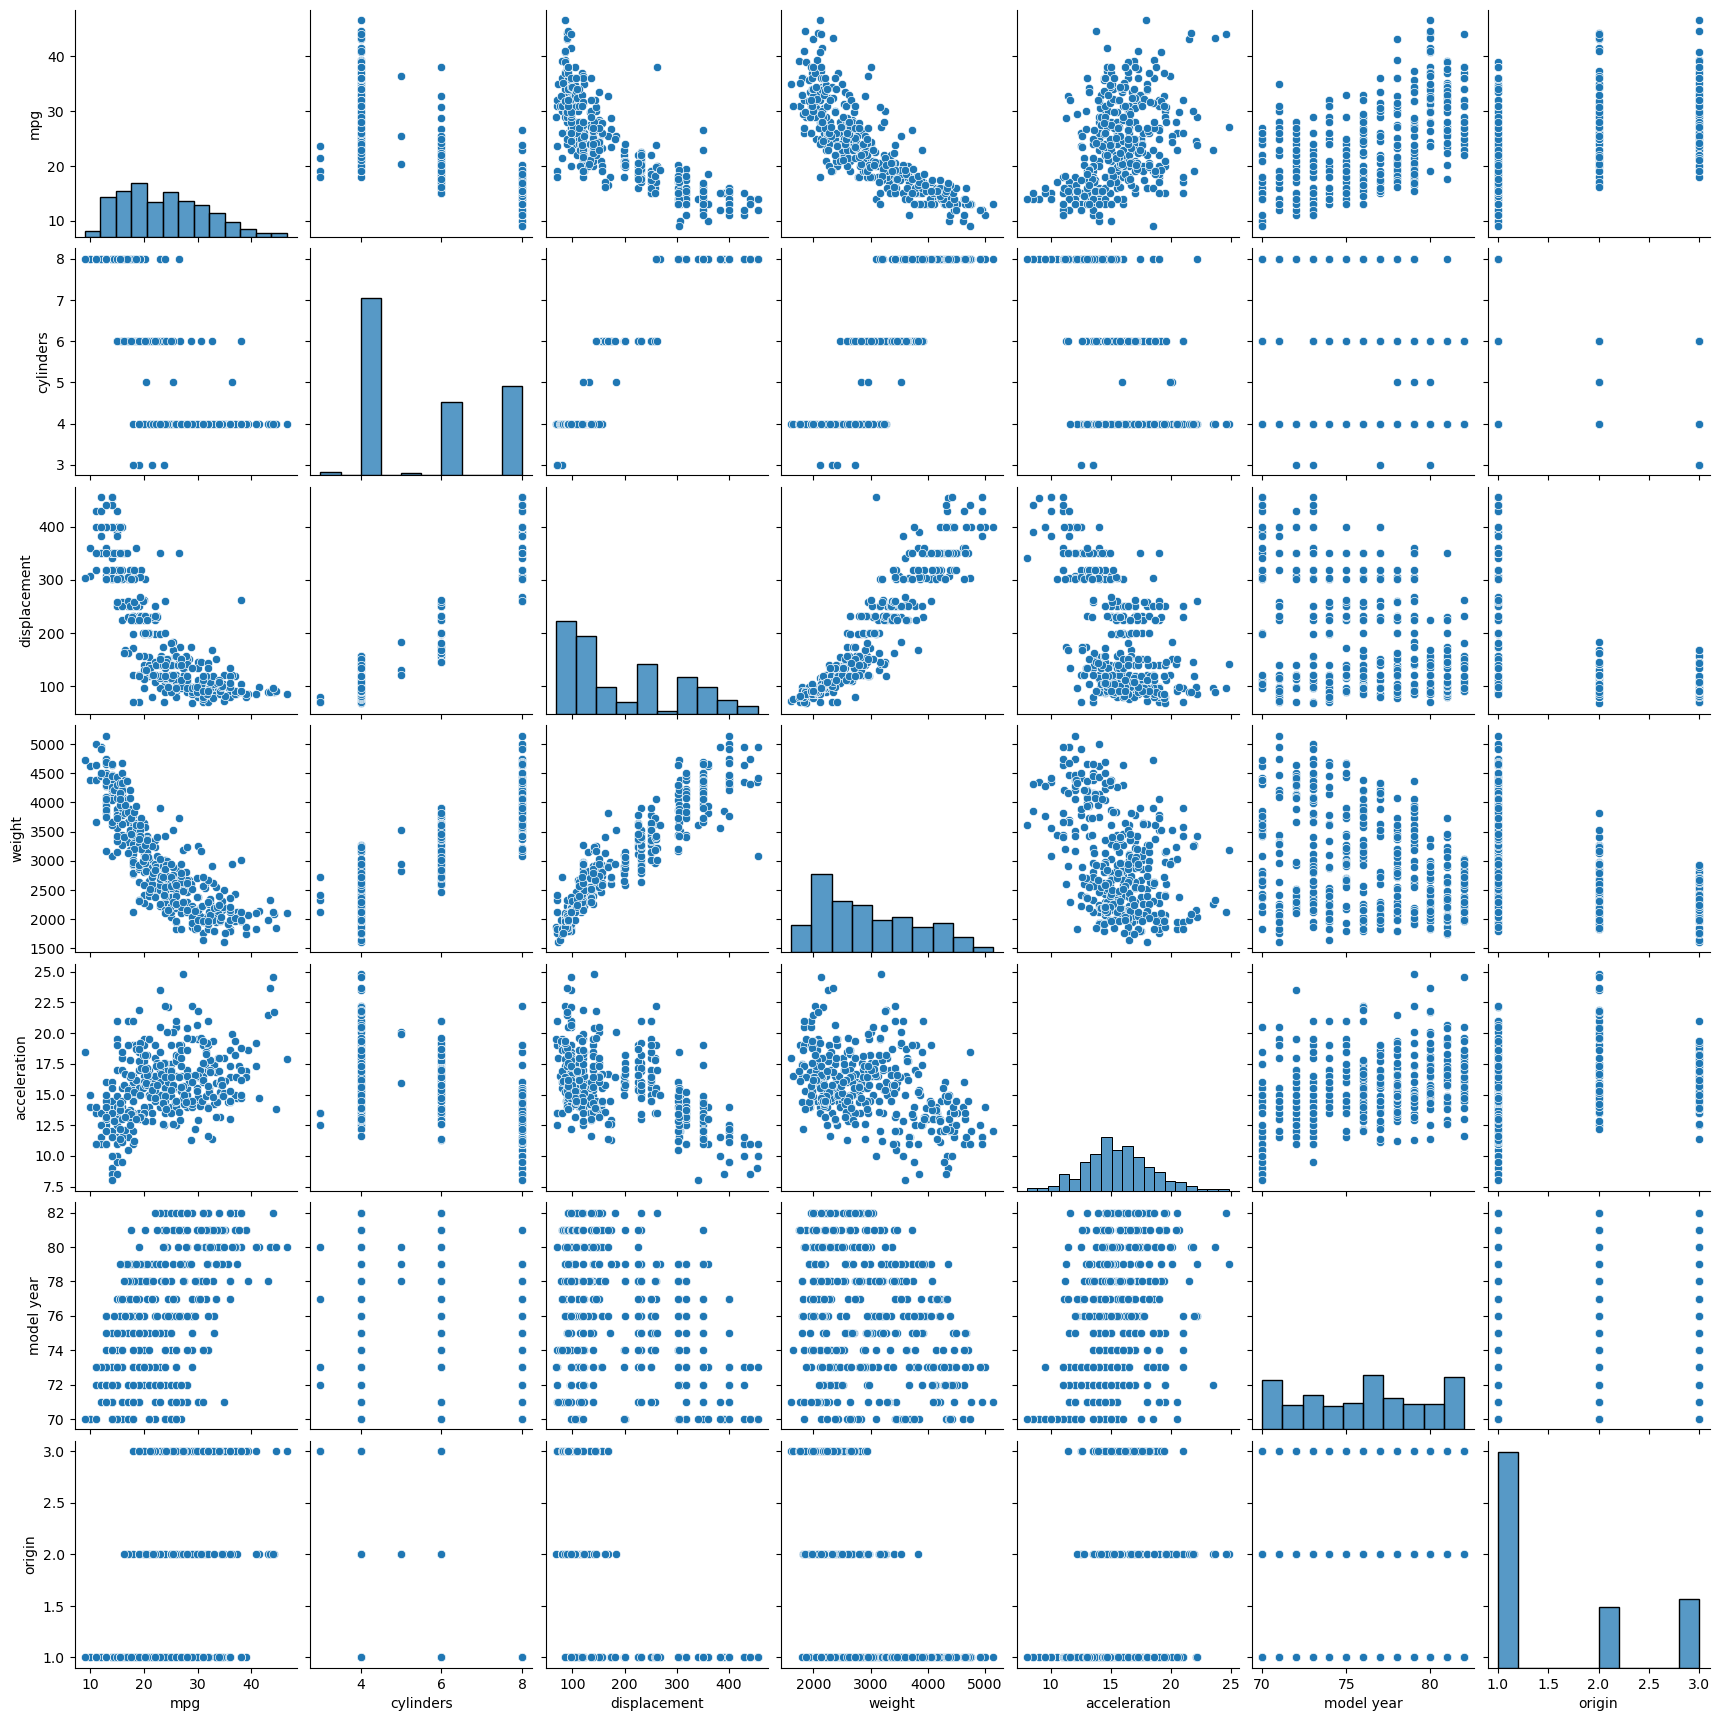

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('./data/auto-mpg.csv', header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 
df.head()
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()
sns.pairplot(df)

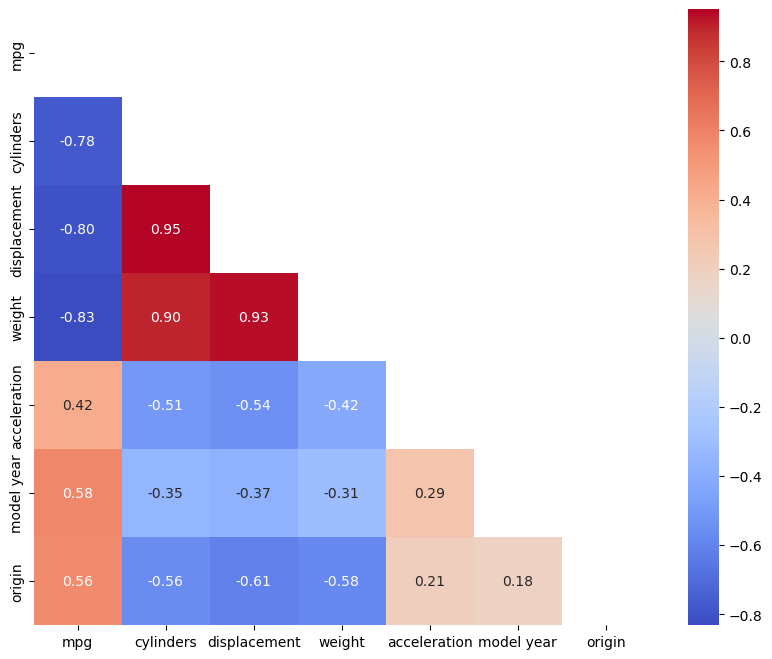

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('./data/auto-mpg.csv', header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

corr = df.corr(numeric_only=True)
corr

mask = np.triu(np.ones_like(corr, dtype=bool))  
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='coolwarm', 
            annot=True, fmt=".2f", cbar=True, square=True)
plt.show()

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('./data/auto-mpg.csv', header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

df['horsepower'].unique()
df['horsepower'] = df['horsepower'].replace('?',np.nan)
df['horsepower'] = df['horsepower'].astype('float')

df.describe()

print(df['horsepower'].isnull().sum())
df_nan = df.dropna(subset=['horsepower'],axis=0)
print(df_nan['horsepower'].isnull().sum())

corr = df.corr(numeric_only=True)
corr

6
0


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.455171,-0.581024,0.205873,0.180662,1.000000


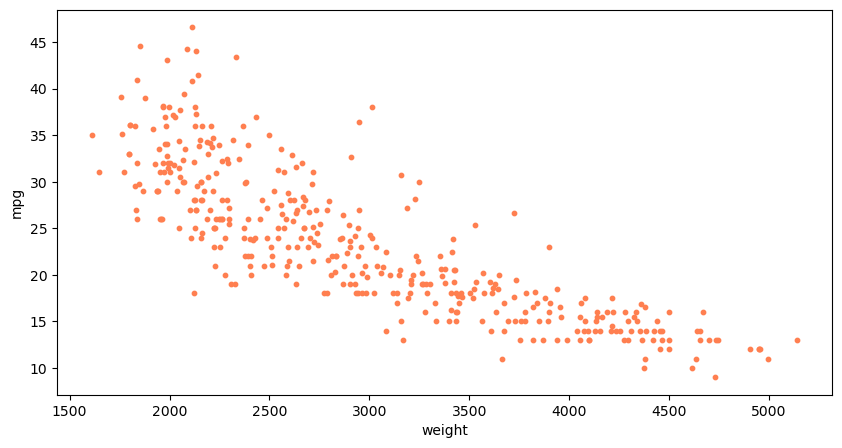

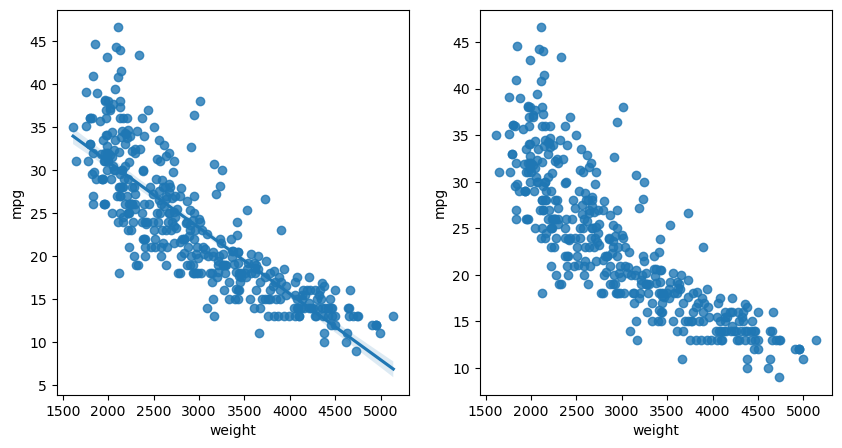

train data 개수:  278
test data 개수:  120
R^2 결정계수:  0.689363809315209
기울기 a:  [-0.0076554]
y절편 b 46.60365052224632
mse : 17.898336128759954


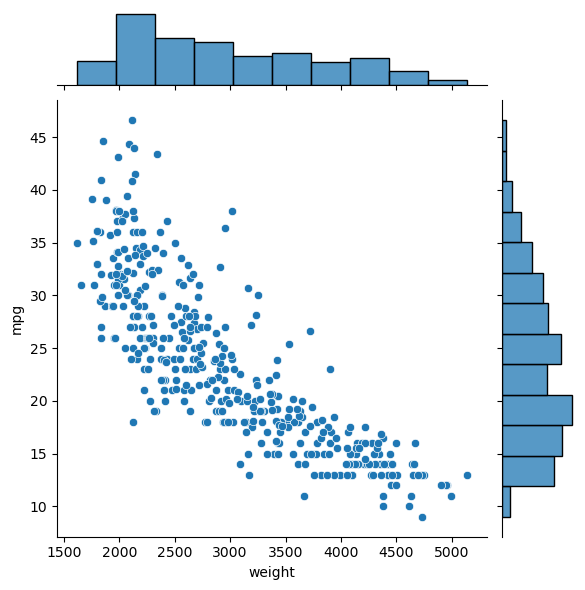

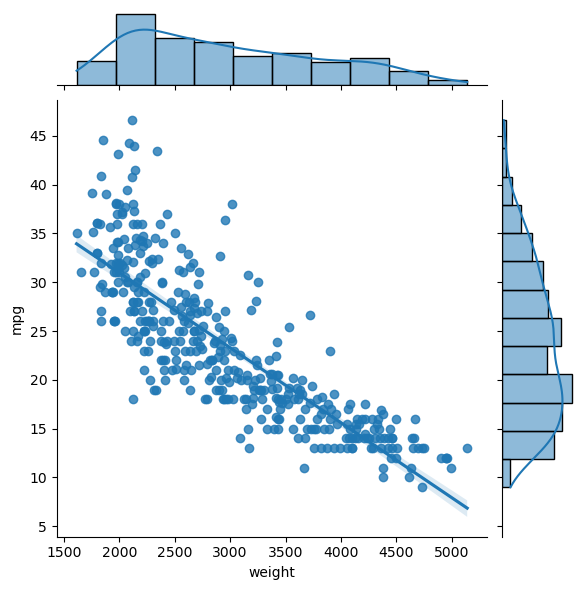

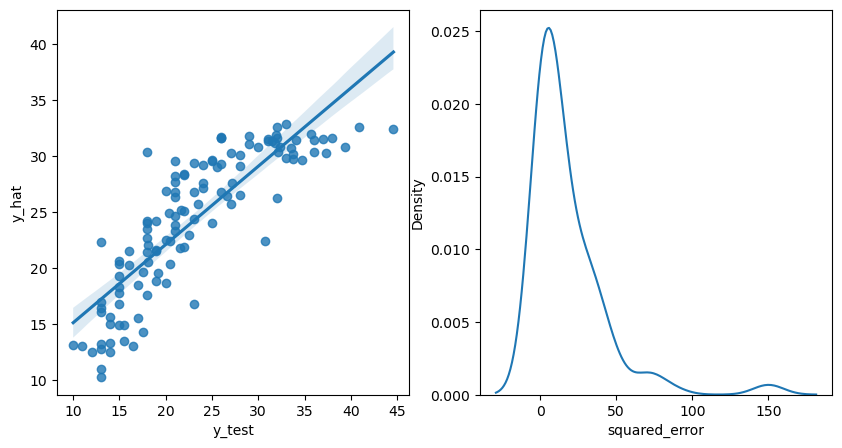

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('./data/auto-mpg.csv', header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
ndf.head()

ndf.plot(kind='scatter', x='weight', y='mpg',  c='coral', s=10, figsize=(10, 5))
plt.show()

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False)
plt.show()

sns.jointplot(x='weight', y='mpg', data=ndf)
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf)

X=ndf[['weight']] 
y=ndf['mpg']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,                
                                                    y,              
                                                    test_size=0.3,   
                                                    random_state=10) 

print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
r_square=lr.score(X_test,y_test)
print('R^2 결정계수: ', r_square)

print('기울기 a: ', lr.coef_)
print('y절편 b', lr.intercept_)

y_hat = lr.predict(X_test)
test_preds = pd.DataFrame(y_test)
test_preds.columns=['y_test']
test_preds['y_hat']=y_hat
test_preds['squared_error']=(test_preds['y_hat'] - test_preds['y_test'])**2
test_preds
mse = test_preds['squared_error'].mean()
print('mse :',mse)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.regplot(x='y_test', y='y_hat',  data=test_preds, ax=axes[0]);  
sns.kdeplot(x='squared_error',  data=test_preds, ax=axes[1]); 